# IMPORTING LIBRARIES

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report 
from sklearn.metrics import r2_score



# IMPORTING DATASET

In [43]:
dataset=pd.read_csv('Health Monitoring.csv')
dataset.head()

,SBP,DBP,Pulse,Temperature,Level
0,120,80,80,98,0
1,140,83,75,100,1
2,155,100,92,104,2
3,115,82,79,97,0
4,119,79,85,102,1


In [44]:
dataset.describe()

,SBP,DBP,Pulse,Temperature,Level
count,149.000000,149.000000,149.000000,149.000000,149.000000
mean,123.516779,81.261745,75.550336,99.926174,0.993289
std,14.486995,9.752613,5.344151,2.056939,0.850252
min,95.000000,60.000000,60.000000,94.000000,0.000000
25%,117.000000,77.000000,72.000000,98.000000,0.000000
50%,119.000000,80.000000,76.000000,100.000000,1.000000
75%,132.000000,88.000000,79.000000,101.000000,2.000000
max,155.000000,101.000000,92.000000,106.000000,2.000000


# DATA VISUALIZATION

In [45]:
x=dataset.iloc[:,0:4].values
x[0:5]

array([[120,  80,  80,  98],
       [140,  83,  75, 100],
       [155, 100,  92, 104],
       [115,  82,  79,  97],
       [119,  79,  85, 102]], dtype=int64)

In [46]:
y=dataset.iloc[:,4:].values
y[0:5]

array([[0],
       [1],
       [2],
       [0],
       [1]], dtype=int64)

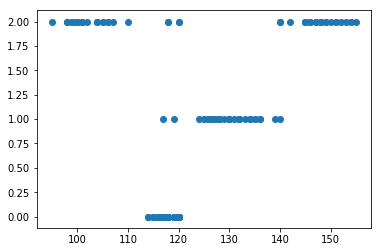

In [47]:
plt.scatter(x[:,0],y[:,0])

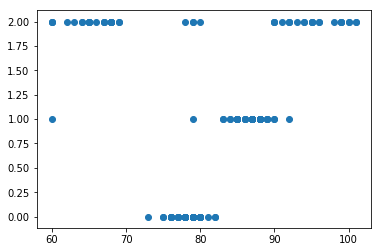

In [48]:
plt.scatter(x[:,1],y[:,0])

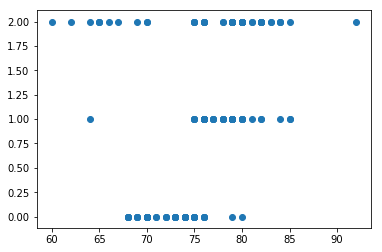

In [49]:
plt.scatter(x[:,2],y[:,0])

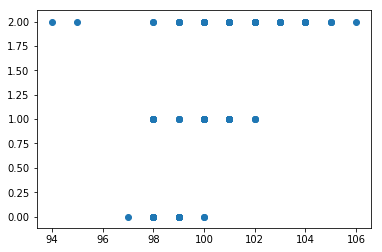

In [50]:
plt.scatter(x[:,3],y[:,0])

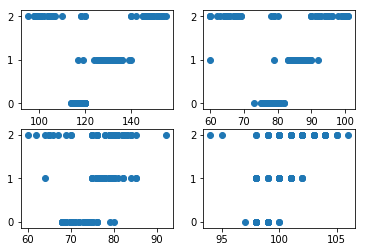

In [51]:
plt.subplot(2,2,1)
plt.scatter(x[:,0],y[:,0])
plt.subplot(2,2,2)
plt.scatter(x[:,1],y[:,0])
plt.subplot(2,2,3)
plt.scatter(x[:,2],y[:,0])
plt.subplot(2,2,4)
plt.scatter(x[:,3],y[:,0])


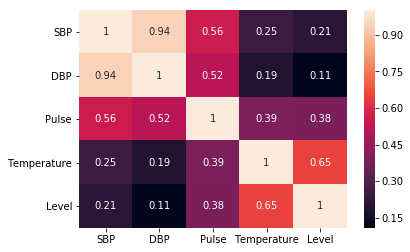

In [52]:
sns.heatmap(dataset.corr(),annot=True)

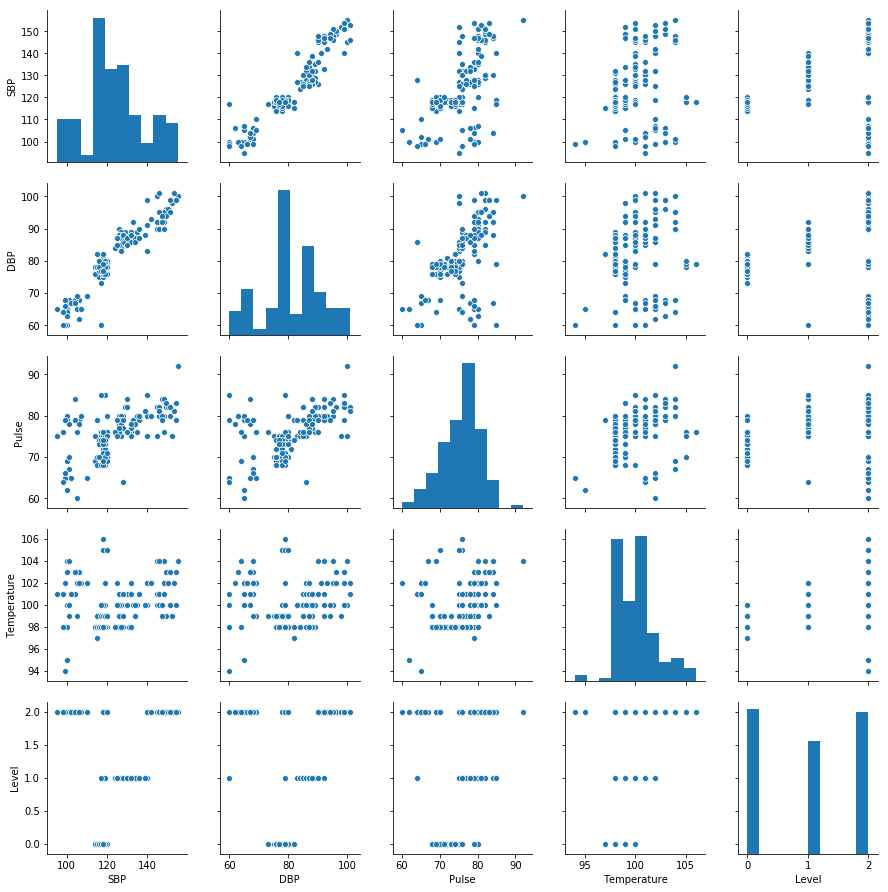

In [53]:
sns.pairplot(dataset)

# TAKING CARE OF MISSING DATA

In [13]:
dataset.isnull().any()

SBP            False
DBP            False
Pulse          False
Temperature    False
Level          False
dtype: bool

AS OUR DATASET CONTAINS ONLY NUMERICALS THERE IS NO NEED OF ANY ENCODING

# TRAIN TEST SPLITTING

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [15]:
x_train.shape

(119, 4)

In [16]:
y_train.shape

(119, 1)

In [17]:
x_test.shape

(30, 4)

In [18]:
y_test.shape

(30, 1)

# MODEL BUILDING

In [19]:
model= DecisionTreeClassifier(criterion='entropy',random_state=0)
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [20]:
import pickle
pickle.dump(model,open('project1.pkl','wb'))

In [21]:
y_pred=model.predict(x_test)
y_pred

array([2, 2, 1, 2, 2, 1, 1, 2, 0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 2, 2, 0,
       2, 1, 0, 2, 0, 0, 0, 2], dtype=int64)

In [22]:
y_test.flatten()

array([2, 2, 1, 2, 2, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 2, 2, 0,
       2, 1, 0, 2, 0, 0, 0, 2], dtype=int64)

# EVALUATING THE MODEL

In [23]:
model.score(x_test, y_test)

0.9666666666666667

In [24]:
accuracy_score(y_test, y_pred) 


0.9666666666666667

In [25]:
print("R2 score : %.2f" % r2_score(y_pred,y_test))

R2 score : 0.96


In [26]:
mean_squared_error(y_test, y_pred)

0.03333333333333333

In [27]:
precision = precision_score(y_test, y_pred, labels=[1,2], average='micro')
print('Precision: %.3f' % precision)

Precision: 0.947


In [28]:
recall = recall_score(y_test, y_pred, labels=[1,2], average='micro')
print('Recall: %.3f' % recall)

Recall: 0.947


In [29]:
score = f1_score(y_test, y_pred, average='micro')
print('F-Measure: %.3f' % score)

F-Measure: 0.967


In [30]:
results = confusion_matrix(y_test, y_pred) 
print(results) 

[[11  0  0]
 [ 0  7  1]
 [ 0  0 11]]
